# Tarush Gupta, Pushti Dalal, Akhil Snehal Modi

# 418 Course Project

# Reading and Cleaning the dataset

In [2]:
import pandas as pd

dataset = pd.read_csv('SalaryDataCopy1.csv')
# Dropping an empty row in the column 'EmployeeName'
dataset.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
dataset = dataset.drop('Other', axis=1)
print(dataset.columns)
print(dataset['AnnualRate'].isnull().values.any())
print(dataset['RegularRate'].isnull().values.any())
print(dataset['OvertimeRate'].isnull().values.any())


Index(['SalaryDataID', 'CalendarYear', 'EmployeeName', 'Department',
       'JobTitle', 'AnnualRate', 'RegularRate', 'OvertimeRate',
       'IncentiveAllowance', 'YearToDate'],
      dtype='object')
False
False
False


In [2]:
print(dataset.describe())

       SalaryDataID  CalendarYear     AnnualRate    RegularRate  \
count  93413.000000  93413.000000   93413.000000   93413.000000   
mean   46715.814041   2013.869643   42404.892685   35110.284585   
std    26970.552093      3.738136   18152.749683   20654.771773   
min        2.000000   2008.000000    1300.000000    -542.100000   
25%    23359.000000   2011.000000   32427.200000   21486.590000   
50%    46715.000000   2014.000000   42577.600000   36507.230000   
75%    70071.000000   2017.000000   52000.000000   48090.750000   
max    93435.000000   2020.000000  216000.200000  184752.180000   

        OvertimeRate  IncentiveAllowance     YearToDate  
count   93413.000000        93413.000000   93413.000000  
mean     3740.145868         1913.633608   41770.486301  
std      7034.874840         3251.039162   25071.899694  
min      -294.120000         -207.150000  -28699.390000  
25%         0.000000            0.000000   24783.920000  
50%       425.210000            0.000000   42407

count     93413.000000
mean      42404.892685
std       18152.749683
min        1300.000000
25%       32427.200000
50%       42577.600000
75%       52000.000000
max      216000.200000
Name: AnnualRate, dtype: float64


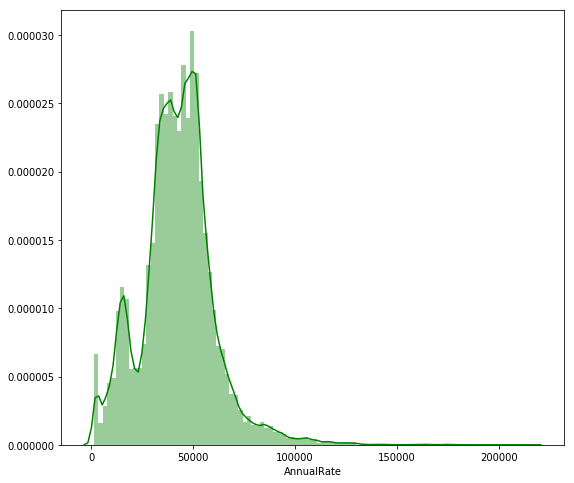

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


print(dataset['AnnualRate'].describe())
plt.figure(figsize=(9,8))
sns.distplot(dataset['AnnualRate'], color='g', bins=100, hist_kws={'alpha': 0.4})
plt.show()

With this information we can see that the Annual Rate is skewed right and some outliers lie between 150000 and 200000. We can eventually get rid of the them to get a normal distribution.

[dtype('int64'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64')]


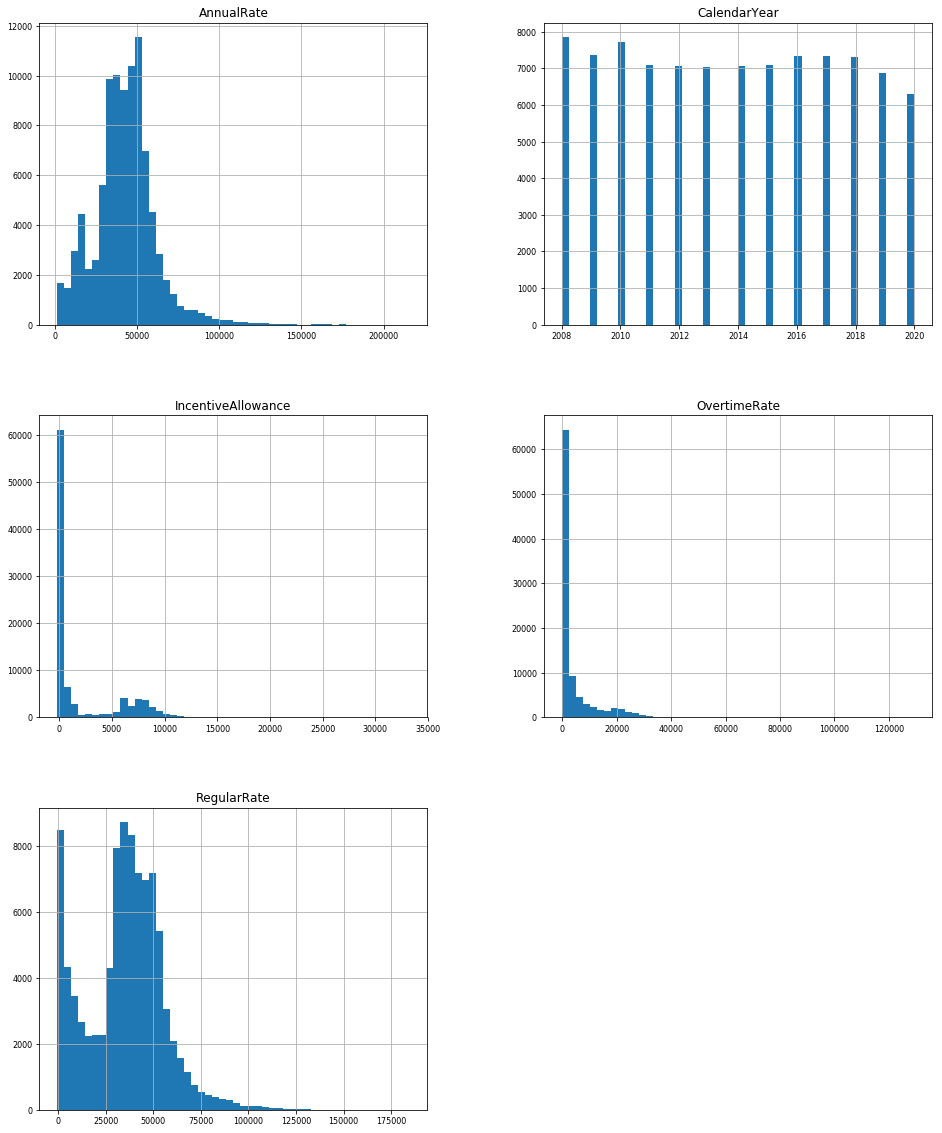

In [35]:
dataTypesList = []
for i in dataset.dtypes:
    dataTypesList.append(i)
    
dfNum = dataset.select_dtypes(include=['float64', 'int64'])
dfNum = dfNum.drop('SalaryDataID', axis=1)
dfNum = dfNum.drop('YearToDate', axis=1)
# dfNum = dfNum.drop('CalendarYear', axis=1)
# print(dfNum)
dfNum.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

print(dataTypesList)

Overall distribution of Annual Rate, Incentinve Allowance, Overtime Rate and Regular Rate.
We see that IncentiveAllowance and OvertimeRate have a similar distribution. 

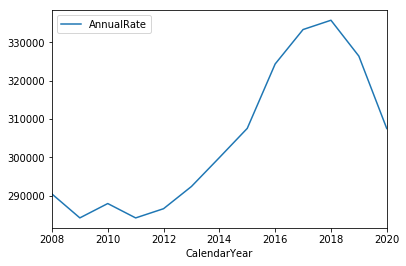

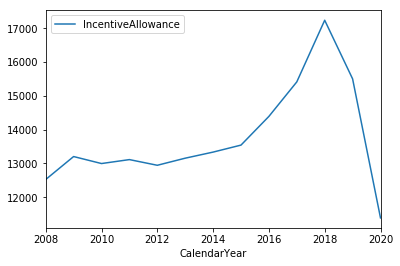

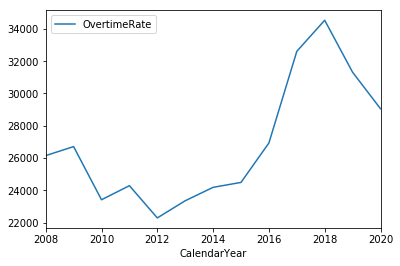

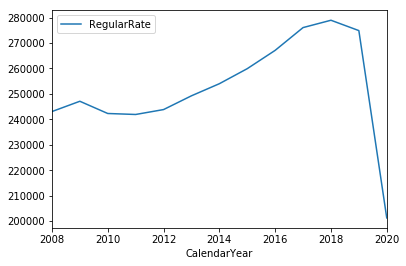

In [4]:
dataList = ['AnnualRate', 'IncentiveAllowance', 'OvertimeRate', 'RegularRate']

yearData = dataset.groupby('CalendarYear').sum() / 1000
for i in dataList:
    yearData.plot(kind='line', y=i)
#     print(yearData[i])

Year wise classification of Annual Rate, Incentinve Allowance, Overtime Rate and Regular Rate. This basically describes which year had the highest and the l9owest Annual Rate, Incentinve Allowance, Overtime Rate and Regular Rate.

1065531747.8


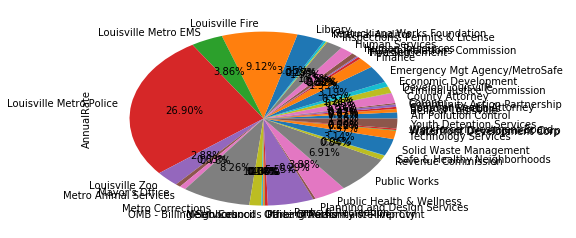

In [25]:
departmentCount = dataset.groupby('Department').sum()
print(departmentCount['AnnualRate'].max())
# yearData = dataset.groupby('CalendarYear').count()
departmentCount.plot(kind='pie', y='AnnualRate', autopct='%1.2f%%', legend=None)


118957667.77


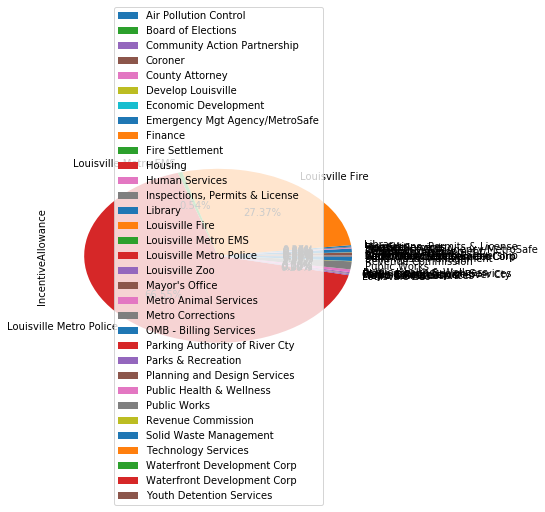

In [48]:
departmentCount = dataset.groupby('Department').sum()
print(departmentCount['IncentiveAllowance'].max())
# yearData = dataset.groupby('CalendarYear').count()
departmentCount.plot(kind='pie', y='IncentiveAllowance', autopct='%1.2f%%', legend=None)
plt.legend(loc='center')


Department
Air Pollution Control               846
Belle of Louisville                1088
Board of Elections                   41
Commonwealth Attorney               307
Community Action Partnership       1289
Coroner                             212
County Attorney                    1449
Criminal Justice Commission          56
Develop Louisville                 1047
Economic Development                617
Emergency Mgt Agency/MetroSafe     2632
Finance                            1480
Fire Settlement                     411
Housing                             365
Human Relations Commission          248
Human Resources                     635
Human Services                     1616
Inspections, Permits & License     1878
Internal Auditor                    108
Kentuckiana Works Foundation        198
Library                            4440
Louisville Fire                    6595
Louisville Metro EMS               3795
Louisville Metro Police           21420
Louisville Zoo               

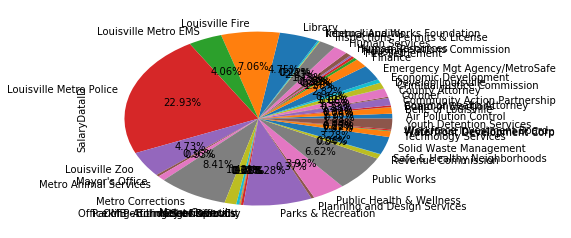

In [12]:
departmentCount = dataset.groupby('Department').count()
print(departmentCount['SalaryDataID'])
departmentCount.plot(kind='pie', y='SalaryDataID', autopct='%1.2f%%', legend=None)

Text(0,0.5,'Regular Rate')

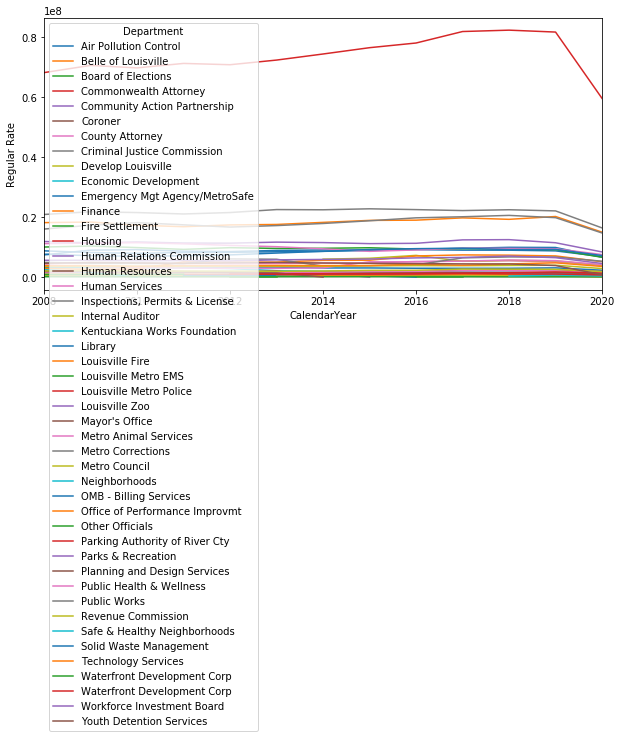

In [49]:
dataset.groupby(['CalendarYear', 'Department'])['RegularRate'].sum().unstack('Department').plot(figsize=(10, 5))
plt.ylabel('Regular Rate')


Text(0,0.5,'Overtime Rate')

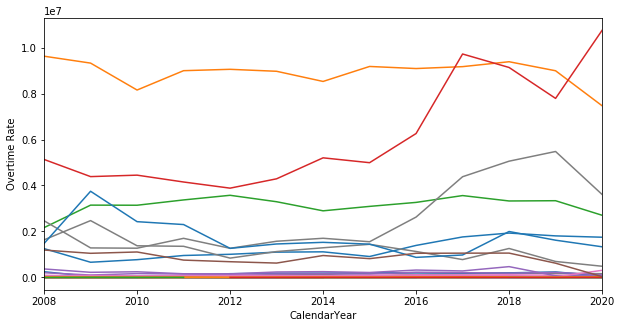

In [33]:
dataset.groupby(['CalendarYear', 'Department'])['OvertimeRate'].sum().unstack('Department').plot(figsize=(10, 5), legend=None)
plt.ylabel('Overtime Rate')

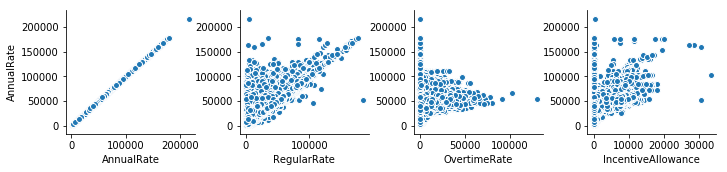

In [44]:
# dfNum = dfNum.drop('AnnualRate', axis=1)
# dfNum = dfNum.drop('CalendarYear', axis=1)

for i in range(0, len(dfNum.columns), 5):
    sns.pairplot(data=dfNum,
                x_vars=dfNum.columns[i+1:i+5],
                y_vars=['AnnualRate'])

# Linear Regression

SalaryDataID
Mean squared error: 674251275.57
CalendarYear
Mean squared error: 12.60
AnnualRate
Mean squared error: 87784596.40
RegularRate
Mean squared error: 17003590.90
OvertimeRate
Mean squared error: 11777643.06
IncentiveAllowance
Mean squared error: 4373968.99
YearToDate
Mean squared error: 18391977.83
[679407768.98, 12.54, 86047191.39, 17079127.86, 11583304.63, 4467842.73, 17627431.23, 18391977.833168447]


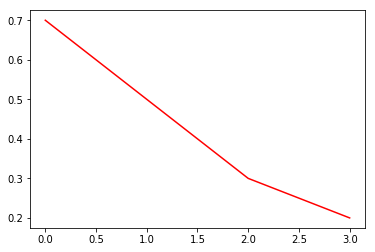

In [18]:
# Importing diabetes dataset
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import LinearRegression


data = []
dfN = dataset.select_dtypes(include=['float64', 'int64'])

for i in dfN:
    x = dfN.drop(i, axis = 1)
#     print(dfN)
    y = dfN[i]

#     print(dfN)
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.20)
    
    
    model = LinearRegression()

    model.fit(X_train, y_train)

    y_train_predict = model.predict(X_train)
    mse = (mean_squared_error(y_train, y_train_predict))

    print(i)
    print('Mean squared error: %.2f'% mse)
    
    
    
    
    
plist = [0.70, 0.50, 0.30, 0.20]
plotting = [679407768.98, 12.54, 86047191.39, 17079127.86, 11583304.63, 4467842.73, 17627431.23]
plotting.append(mse)
print(plotting)

plt.plot(plist, color='red')
num=np.arange(1,14) 



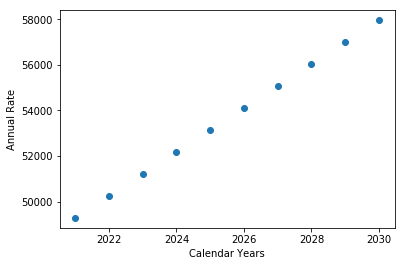

In [19]:
def arrayToListAndPlot(predictList):
    list1 = []
    for i in range(len(predictList)):
        a = predictList[i]
        list1.append(a[0])
    return list1
    
lin = LinearRegression()

predictList = []
predYears = [2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
for year in predYears:
    x3 = dfN['CalendarYear'].values.reshape(-1,1)
    y3 = dfN['AnnualRate'].values.reshape(-1, 1)
    lin.fit(x3, y3)
    pred3 = lin.predict([[year]])
    predictList.append(pred3[0])
list1 = arrayToListAndPlot(predictList) 
plt.scatter(x = predYears, y = list1)
plt.xlabel('Calendar Years')
plt.ylabel('Annual Rate')
plt.show()


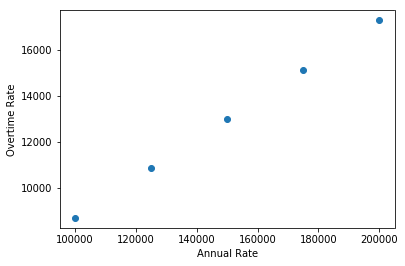

In [20]:
predictList2 = []
predOvertime = [100000, 125000, 150000, 175000, 200000]

for over in predOvertime:
    x1 = dfN['AnnualRate'].values.reshape(-1,1)
    y1 = dfN['OvertimeRate'].values.reshape(-1, 1)
    lin.fit(x1, y1)
    pred1 = lin.predict([[over]])
    predictList2.append(pred1[0])
list2 = arrayToListAndPlot(predictList2)
plt.scatter(x = predOvertime, y = list2)
plt.xlabel('Annual Rate')
plt.ylabel('Overtime Rate')
plt.show()

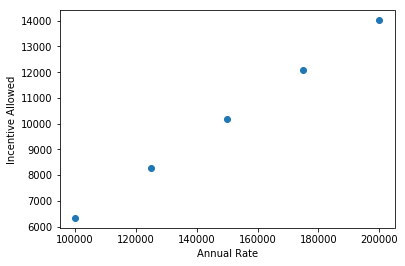

In [21]:
predictList3 = []
predIncentive = [100000, 125000, 150000, 175000, 200000]

for inc in predIncentive:
    x2 = dfN['AnnualRate'].values.reshape(-1,1)
    y2 = dfN['IncentiveAllowance'].values.reshape(-1, 1)
    lin.fit(x2, y2)
    pred2 = lin.predict([[inc]])
    predictList3.append(pred2[0])
list3 = arrayToListAndPlot(predictList3)
plt.scatter(x = predIncentive, y = list3)
plt.xlabel('Annual Rate')
plt.ylabel('Incentive Allowed')
plt.show()

# Prediction

In [45]:
import pandas as pd

predictData = pd.read_csv('SalaryDataCopy1.csv', nrows=1000)


predictData['predict'] = predictData['AnnualRate']



for i in predictData['predict'].values:
#     print(i)
    if i < float(35000):
        predictData['predict'] = predictData['predict'].replace(i, 'one')
    elif i >= float(35000) and i <= float(45000):
#         predictData = predictData.replace({'predict': 1})
        predictData['predict'] = predictData['predict'].replace(i, 'two')
    else:
#         predictData = predictData.replace({'predict': 2})
        predictData['predict'] = predictData['predict'].replace(i, 'three')
    


# KNeighbors Classifier

             precision    recall  f1-score   support

          0       0.76      0.76      0.76        17
          1       0.92      0.95      0.94       152
          2       0.85      0.71      0.77        31

avg / total       0.90      0.90      0.90       200

Accuracy 0.9
[[ 13   3   1]
 [  4 145   3]
 [  0   9  22]]


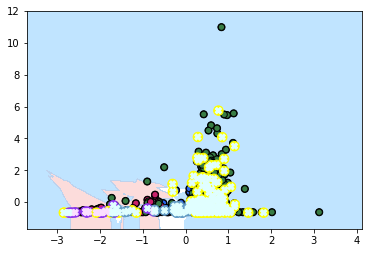

In [46]:
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm


scaler = StandardScaler()



predictData['AnnualRate'] = predictData['AnnualRate'].fillna(0)
# print(predictData['AnnualRate'].dtypes)
labelEnc = preprocessing.LabelEncoder()
predictData['predict'] = labelEnc.fit_transform(predictData['predict'].values)

dataTypesList = []
for i in predictData.dtypes:
    dataTypesList.append(i)
    
# print(dataTypesList)
    
dfNum = predictData.select_dtypes(include=['float64', 'int64'])
y = dfNum['predict'].values
x = dfNum.drop('predict', axis=1).values
# print(dfNum.columns)

x_Train, x_Test, ys_train, ys_test = train_test_split(x, y, test_size=0.2, random_state=40)
# xtrain = x_Train[:, :2]
# xtest = x_Test[:, :2]

xtrain = x_Train[:, [3, 4]]
xtest = x_Test[:, [3, 4]]

scaler.fit(xtrain)
StandardScaler(copy=True, with_mean=True, with_std=True)
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

# print(x_Train[:, 1])

def meshGrid (x , y , h):
    '''x is data for x-axis meshgrid
       y is data for y-axis meshgrid
       h is stepsize
    '''
    x_min, x_max = x.min() - 1 , x.max() + 1
    y_min, y_max = y.min() - 1 , y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    return xx , yy


cmap_light = ListedColormap(['#FBBBB9', '#5EFB6E', '#82CAFF'])
cmap_bold = ListedColormap(['#CA226B', '#387C44', '#2B65EC'])
cmap_test = ListedColormap(['#8E35EF', '#FFFF00', '#659EC7'])
cmap_predict = ListedColormap(['#FCDFFF', '#E0FFFF'])



# clf1 is a linear svm classifier
# clf1 = svm.SVC(kernel = 'rbf')

clf1 = KNeighborsClassifier(6)
# Fit data
clf1.fit(xtrain, ys_train)

# Predict
ys_predict = clf1.predict(xtest)


#Display the outcome of classification
print(classification_report(ys_test, ys_predict))
print("Accuracy", accuracy_score(ys_test, ys_predict, normalize=True))
print(confusion_matrix(ys_test, ys_predict))

# Display the svm 
xx , yy = meshGrid(xtrain[:,0], xtrain[:,1], 0.01)



Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap_light ,levels=[-1, 0, 1] ,alpha = 0.5)

# For plotting all data use the following line
plt.scatter(xtrain[:, 0], xtrain[:, 1], c=ys_train, cmap=cmap_bold, edgecolor='k', s=50)

# For plotting train and test and prediction separatley 
plt.scatter(xtrain[:, 0], xtrain[:, 1], c=ys_train, cmap=cmap_bold,edgecolor='k', s=40)
plt.scatter(xtest[:, 0], xtest[:, 1], alpha=1.0,c = ys_test, cmap=cmap_test,linewidth=1, marker='o', s=90)
plt.scatter(xtest[:, 0], xtest[:, 1], alpha=1.0,c = ys_predict, cmap=cmap_predict ,linewidth=1, marker='X', s=40)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

# Linear SVM Model

C:\Users\modia\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.48      0.88      0.62        17
          1       0.85      0.94      0.89       152
          2       0.00      0.00      0.00        31

avg / total       0.68      0.79      0.73       200

Accuracy 0.79
[[ 15   2   0]
 [  9 143   0]
 [  7  24   0]]


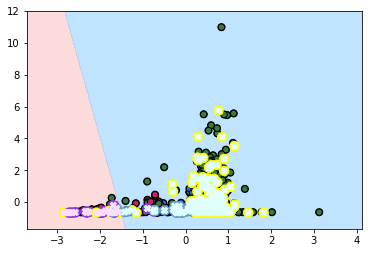

In [24]:
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm


labelEnc = preprocessing.LabelEncoder()
predictData['predict'] = labelEnc.fit_transform(predictData['predict'].values)

dataTypesList = []
for i in predictData.dtypes:
    dataTypesList.append(i)
    
dfNum = predictData.select_dtypes(include=['float64', 'int64'])
y = dfNum['predict'].values
x = dfNum.drop('predict', axis=1).values


x_Train, x_Test, ys_train, ys_test = train_test_split(x, y, test_size=0.2, random_state=40)
xtrain = x_Train[:, [3, 4]]
xtest = x_Test[:, [3, 4]]

scaler = StandardScaler()
scaler.fit(xtrain)
StandardScaler(copy=True, with_mean=True, with_std=True)
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

def meshGrid (x , y , h):
    '''x is data for x-axis meshgrid
       y is data for y-axis meshgrid
       h is stepsize
    '''
    x_min, x_max = x.min() - 1 , x.max() + 1
    y_min, y_max = y.min() - 1 , y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    return xx , yy


cmap_light = ListedColormap(['#FBBBB9', '#5EFB6E', '#82CAFF'])
cmap_bold = ListedColormap(['#CA226B', '#387C44', '#2B65EC'])
cmap_test = ListedColormap(['#8E35EF', '#FFFF00', '#659EC7'])
cmap_predict = ListedColormap(['#FCDFFF', '#E0FFFF'])



# clf1 is a linear svm classifier
clf1 = svm.SVC(kernel = 'linear')

# clf1 = KNeighborsClassifier(6)
# Fit data
clf1.fit(xtrain, ys_train)

# Predict
ys_predict = clf1.predict(xtest)


#Display the outcome of classification
print(classification_report(ys_test, ys_predict))
print("Accuracy", accuracy_score(ys_test, ys_predict, normalize=True))
print(confusion_matrix(ys_test, ys_predict))

# Display the svm 
xx , yy = meshGrid(xtrain[:,0], xtrain[:,1], 0.01)



Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap_light ,levels=[-1, 0, 1] ,alpha = 0.5)

# For plotting all data use the following line
plt.scatter(xtrain[:, 0], xtrain[:, 1], c=ys_train, cmap=cmap_bold, edgecolor='k', s=50)

# For plotting train and test and prediction separatley 
plt.scatter(xtrain[:, 0], xtrain[:, 1], c=ys_train, cmap=cmap_bold,edgecolor='k', s=40)
plt.scatter(xtest[:, 0], xtest[:, 1], alpha=1.0,c = ys_test, cmap=cmap_test,linewidth=1, marker='o', s=90)
plt.scatter(xtest[:, 0], xtest[:, 1], alpha=1.0,c = ys_predict, cmap=cmap_predict ,linewidth=1, marker='X', s=40)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

# Non-Linear SVM Model

             precision    recall  f1-score   support

          0       0.48      0.88      0.62        17
          1       0.95      0.93      0.94       152
          2       0.84      0.52      0.64        31

avg / total       0.89      0.86      0.87       200

Accuracy 0.865
[[ 15   0   2]
 [  9 142   1]
 [  7   8  16]]


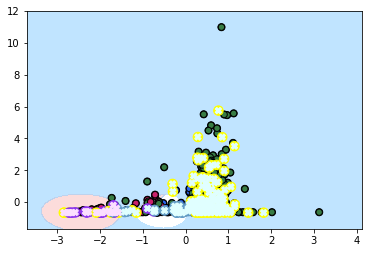

In [25]:
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm


labelEnc = preprocessing.LabelEncoder()
predictData['predict'] = labelEnc.fit_transform(predictData['predict'].values)

dataTypesList = []
for i in predictData.dtypes:
    dataTypesList.append(i)
    
dfNum = predictData.select_dtypes(include=['float64', 'int64'])
y = dfNum['predict'].values
x = dfNum.drop('predict', axis=1).values


x_Train, x_Test, ys_train, ys_test = train_test_split(x, y, test_size=0.2, random_state=40)
xtrain = x_Train[:, [3, 4]]
xtest = x_Test[:, [3, 4]]

scaler = StandardScaler()
scaler.fit(xtrain)
StandardScaler(copy=True, with_mean=True, with_std=True)
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

def meshGrid (x , y , h):
    '''x is data for x-axis meshgrid
       y is data for y-axis meshgrid
       h is stepsize
    '''
    x_min, x_max = x.min() - 1 , x.max() + 1
    y_min, y_max = y.min() - 1 , y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    return xx , yy


cmap_light = ListedColormap(['#FBBBB9', '#5EFB6E', '#82CAFF'])
cmap_bold = ListedColormap(['#CA226B', '#387C44', '#2B65EC'])
cmap_test = ListedColormap(['#8E35EF', '#FFFF00', '#659EC7'])
cmap_predict = ListedColormap(['#FCDFFF', '#E0FFFF'])



# clf1 is a linear svm classifier
clf1 = svm.SVC(kernel = 'rbf')

# clf1 = KNeighborsClassifier(6)
# Fit data
clf1.fit(xtrain, ys_train)

# Predict
ys_predict = clf1.predict(xtest)


#Display the outcome of classification
print(classification_report(ys_test, ys_predict))
print("Accuracy", accuracy_score(ys_test, ys_predict, normalize=True))
print(confusion_matrix(ys_test, ys_predict))

# Display the svm 
xx , yy = meshGrid(xtrain[:,0], xtrain[:,1], 0.01)



Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap_light ,levels=[-1, 0, 1] ,alpha = 0.5)

# For plotting all data use the following line
plt.scatter(xtrain[:, 0], xtrain[:, 1], c=ys_train, cmap=cmap_bold, edgecolor='k', s=50)

# For plotting train and test and prediction separatley 
plt.scatter(xtrain[:, 0], xtrain[:, 1], c=ys_train, cmap=cmap_bold,edgecolor='k', s=40)
plt.scatter(xtest[:, 0], xtest[:, 1], alpha=1.0,c = ys_test, cmap=cmap_test,linewidth=1, marker='o', s=90)
plt.scatter(xtest[:, 0], xtest[:, 1], alpha=1.0,c = ys_predict, cmap=cmap_predict ,linewidth=1, marker='X', s=40)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

# Decision Tree Model

             precision    recall  f1-score   support

          0       0.69      0.65      0.67        17
          1       0.90      0.95      0.92       152
          2       0.83      0.65      0.73        31

avg / total       0.87      0.88      0.87       200

Accuracy 0.875
[[ 11   6   0]
 [  4 144   4]
 [  1  10  20]]


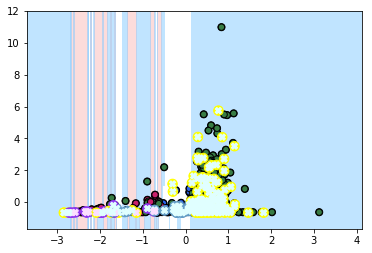

In [26]:
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree


labelEnc = preprocessing.LabelEncoder()
predictData['predict'] = labelEnc.fit_transform(predictData['predict'].values)

dataTypesList = []
for i in predictData.dtypes:
    dataTypesList.append(i)
    
dfNum = predictData.select_dtypes(include=['float64', 'int64'])
y = dfNum['predict'].values
x = dfNum.drop('predict', axis=1).values


x_Train, x_Test, ys_train, ys_test = train_test_split(x, y, test_size=0.2, random_state=40)
xtrain = x_Train[:, [3, 4]]
xtest = x_Test[:, [3, 4]]

scaler = StandardScaler()
scaler.fit(xtrain)
StandardScaler(copy=True, with_mean=True, with_std=True)
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

def meshGrid (x , y , h):
    '''x is data for x-axis meshgrid
       y is data for y-axis meshgrid
       h is stepsize
    '''
    x_min, x_max = x.min() - 1 , x.max() + 1
    y_min, y_max = y.min() - 1 , y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    return xx , yy


cmap_light = ListedColormap(['#FBBBB9', '#5EFB6E', '#82CAFF'])
cmap_bold = ListedColormap(['#CA226B', '#387C44', '#2B65EC'])
cmap_test = ListedColormap(['#8E35EF', '#FFFF00', '#659EC7'])
cmap_predict = ListedColormap(['#FCDFFF', '#E0FFFF'])



# clf1 is a linear svm classifier
# clf1 = svm.SVC(kernel = 'rbf')
clf1 = tree.DecisionTreeClassifier()

# clf1 = KNeighborsClassifier(6)
# Fit data
clf1.fit(xtrain, ys_train)

# Predict
ys_predict = clf1.predict(xtest)


#Display the outcome of classification
print(classification_report(ys_test, ys_predict))
print("Accuracy", accuracy_score(ys_test, ys_predict, normalize=True))
print(confusion_matrix(ys_test, ys_predict))

# Display the svm 
xx , yy = meshGrid(xtrain[:,0], xtrain[:,1], 0.01)



Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap_light ,levels=[-1, 0, 1] ,alpha = 0.5)

# For plotting all data use the following line
plt.scatter(xtrain[:, 0], xtrain[:, 1], c=ys_train, cmap=cmap_bold, edgecolor='k', s=50)

# For plotting train and test and prediction separatley 
plt.scatter(xtrain[:, 0], xtrain[:, 1], c=ys_train, cmap=cmap_bold,edgecolor='k', s=40)
plt.scatter(xtest[:, 0], xtest[:, 1], alpha=1.0,c = ys_test, cmap=cmap_test,linewidth=1, marker='o', s=90)
plt.scatter(xtest[:, 0], xtest[:, 1], alpha=1.0,c = ys_predict, cmap=cmap_predict ,linewidth=1, marker='X', s=40)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

# Naive Bayes Classifier

             precision    recall  f1-score   support

          0       0.45      0.88      0.60        17
          1       0.89      0.93      0.91       152
          2       0.56      0.16      0.25        31

avg / total       0.80      0.81      0.78       200

Accuracy 0.805
[[ 15   0   2]
 [  9 141   2]
 [  9  17   5]]


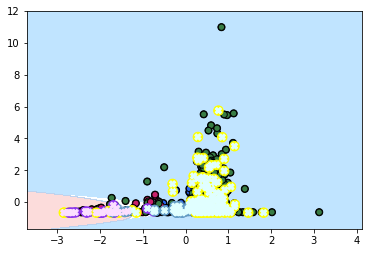

In [27]:
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


labelEnc = preprocessing.LabelEncoder()
predictData['predict'] = labelEnc.fit_transform(predictData['predict'].values)

dataTypesList = []
for i in predictData.dtypes:
    dataTypesList.append(i)
    
dfNum = predictData.select_dtypes(include=['float64', 'int64'])
y = dfNum['predict'].values
x = dfNum.drop('predict', axis=1).values


x_Train, x_Test, ys_train, ys_test = train_test_split(x, y, test_size=0.2, random_state=40)
xtrain = x_Train[:, [3, 4]]
xtest = x_Test[:, [3, 4]]

scaler = StandardScaler()
scaler.fit(xtrain)
StandardScaler(copy=True, with_mean=True, with_std=True)
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

def meshGrid (x , y , h):
    '''x is data for x-axis meshgrid
       y is data for y-axis meshgrid
       h is stepsize
    '''
    x_min, x_max = x.min() - 1 , x.max() + 1
    y_min, y_max = y.min() - 1 , y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    return xx , yy


cmap_light = ListedColormap(['#FBBBB9', '#5EFB6E', '#82CAFF'])
cmap_bold = ListedColormap(['#CA226B', '#387C44', '#2B65EC'])
cmap_test = ListedColormap(['#8E35EF', '#FFFF00', '#659EC7'])
cmap_predict = ListedColormap(['#FCDFFF', '#E0FFFF'])



# clf1 is a linear svm classifier
# clf1 = svm.SVC(kernel = 'rbf')
clf1 = GaussianNB()

# clf1 = KNeighborsClassifier(6)
# Fit data
clf1.fit(xtrain, ys_train)

# Predict
ys_predict = clf1.predict(xtest)


#Display the outcome of classification
print(classification_report(ys_test, ys_predict))
print("Accuracy", accuracy_score(ys_test, ys_predict, normalize=True))
print(confusion_matrix(ys_test, ys_predict))

# Display the svm 
xx , yy = meshGrid(xtrain[:,0], xtrain[:,1], 0.01)



Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap_light ,levels=[-1, 0, 1] ,alpha = 0.5)

# For plotting all data use the following line
plt.scatter(xtrain[:, 0], xtrain[:, 1], c=ys_train, cmap=cmap_bold, edgecolor='k', s=50)

# For plotting train and test and prediction separatley 
plt.scatter(xtrain[:, 0], xtrain[:, 1], c=ys_train, cmap=cmap_bold,edgecolor='k', s=40)
plt.scatter(xtest[:, 0], xtest[:, 1], alpha=1.0,c = ys_test, cmap=cmap_test,linewidth=1, marker='o', s=90)
plt.scatter(xtest[:, 0], xtest[:, 1], alpha=1.0,c = ys_predict, cmap=cmap_predict ,linewidth=1, marker='X', s=40)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

# We found that KNN is the best so we decided to use that for further prediction

# Regular Rate and Incentive Allowed

float64
Index(['SalaryDataID', 'CalendarYear', 'AnnualRate', 'RegularRate',
       'OvertimeRate', 'IncentiveAllowance', 'Other', 'YearToDate', 'predict'],
      dtype='object')
             precision    recall  f1-score   support

          0       0.94      0.94      0.94        17
          1       0.97      0.97      0.97       152
          2       0.90      0.87      0.89        31

avg / total       0.95      0.95      0.95       200

Accuracy 0.955
[[ 16   1   0]
 [  1 148   3]
 [  0   4  27]]


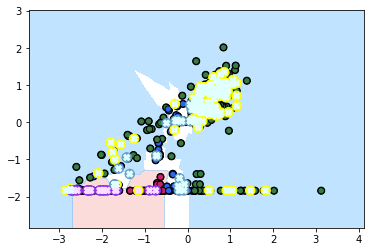

In [28]:
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm


scaler = StandardScaler()



predictData['AnnualRate'] = predictData['AnnualRate'].fillna(0)
print(predictData['AnnualRate'].dtypes)
labelEnc = preprocessing.LabelEncoder()
predictData['predict'] = labelEnc.fit_transform(predictData['predict'].values)

dataTypesList = []
for i in predictData.dtypes:
    dataTypesList.append(i)
    
# print(dataTypesList)
    
dfNum = predictData.select_dtypes(include=['float64', 'int64'])
y = dfNum['predict'].values
x = dfNum.drop('predict', axis=1).values
print(dfNum.columns)

x_Train, x_Test, ys_train, ys_test = train_test_split(x, y, test_size=0.2, random_state=40)
# xtrain = x_Train[:, :2]
# xtest = x_Test[:, :2]

xtrain = x_Train[:, [3, 5]]
xtest = x_Test[:, [3, 5]]

scaler.fit(xtrain)
StandardScaler(copy=True, with_mean=True, with_std=True)
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

# print(x_Train[:, 1])

def meshGrid (x , y , h):
    '''x is data for x-axis meshgrid
       y is data for y-axis meshgrid
       h is stepsize
    '''
    x_min, x_max = x.min() - 1 , x.max() + 1
    y_min, y_max = y.min() - 1 , y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    return xx , yy


cmap_light = ListedColormap(['#FBBBB9', '#5EFB6E', '#82CAFF'])
cmap_bold = ListedColormap(['#CA226B', '#387C44', '#2B65EC'])
cmap_test = ListedColormap(['#8E35EF', '#FFFF00', '#659EC7'])
cmap_predict = ListedColormap(['#FCDFFF', '#E0FFFF'])



# clf1 is a linear svm classifier
# clf1 = svm.SVC(kernel = 'rbf')

clf1 = KNeighborsClassifier(6)
# Fit data
clf1.fit(xtrain, ys_train)

# Predict
ys_predict = clf1.predict(xtest)


#Display the outcome of classification
print(classification_report(ys_test, ys_predict))
print("Accuracy", accuracy_score(ys_test, ys_predict, normalize=True))
print(confusion_matrix(ys_test, ys_predict))

# Display the svm 
xx , yy = meshGrid(xtrain[:,0], xtrain[:,1], 0.01)



Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap_light ,levels=[-1, 0, 1] ,alpha = 0.5)

# For plotting all data use the following line
plt.scatter(xtrain[:, 0], xtrain[:, 1], c=ys_train, cmap=cmap_bold, edgecolor='k', s=50)

# For plotting train and test and prediction separatley 
plt.scatter(xtrain[:, 0], xtrain[:, 1], c=ys_train, cmap=cmap_bold,edgecolor='k', s=40)
plt.scatter(xtest[:, 0], xtest[:, 1], alpha=1.0,c = ys_test, cmap=cmap_test,linewidth=1, marker='o', s=90)
plt.scatter(xtest[:, 0], xtest[:, 1], alpha=1.0,c = ys_predict, cmap=cmap_predict ,linewidth=1, marker='X', s=40)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

# Overtime Rate and Incentive Allowed

float64
Index(['SalaryDataID', 'CalendarYear', 'AnnualRate', 'RegularRate',
       'OvertimeRate', 'IncentiveAllowance', 'Other', 'YearToDate', 'predict'],
      dtype='object')
             precision    recall  f1-score   support

          0       1.00      0.41      0.58        17
          1       0.87      0.95      0.91       152
          2       0.70      0.61      0.66        31

avg / total       0.85      0.85      0.84       200

Accuracy 0.85
[[  7  10   0]
 [  0 144   8]
 [  0  12  19]]


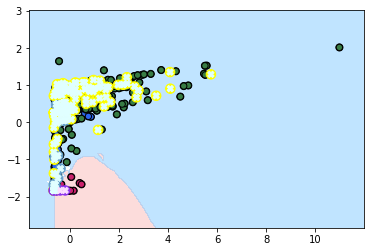

In [29]:
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm


scaler = StandardScaler()



predictData['AnnualRate'] = predictData['AnnualRate'].fillna(0)
print(predictData['AnnualRate'].dtypes)
labelEnc = preprocessing.LabelEncoder()
predictData['predict'] = labelEnc.fit_transform(predictData['predict'].values)

dataTypesList = []
for i in predictData.dtypes:
    dataTypesList.append(i)
    
# print(dataTypesList)
    
dfNum = predictData.select_dtypes(include=['float64', 'int64'])
y = dfNum['predict'].values
x = dfNum.drop('predict', axis=1).values
print(dfNum.columns)

x_Train, x_Test, ys_train, ys_test = train_test_split(x, y, test_size=0.2, random_state=40)
# xtrain = x_Train[:, :2]
# xtest = x_Test[:, :2]

xtrain = x_Train[:, [4, 5]]
xtest = x_Test[:, [4, 5]]

scaler.fit(xtrain)
StandardScaler(copy=True, with_mean=True, with_std=True)
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

# print(x_Train[:, 1])

def meshGrid (x , y , h):
    '''x is data for x-axis meshgrid
       y is data for y-axis meshgrid
       h is stepsize
    '''
    x_min, x_max = x.min() - 1 , x.max() + 1
    y_min, y_max = y.min() - 1 , y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    return xx , yy


cmap_light = ListedColormap(['#FBBBB9', '#5EFB6E', '#82CAFF'])
cmap_bold = ListedColormap(['#CA226B', '#387C44', '#2B65EC'])
cmap_test = ListedColormap(['#8E35EF', '#FFFF00', '#659EC7'])
cmap_predict = ListedColormap(['#FCDFFF', '#E0FFFF'])



# clf1 is a linear svm classifier
# clf1 = svm.SVC(kernel = 'rbf')

clf1 = KNeighborsClassifier(6)
# Fit data
clf1.fit(xtrain, ys_train)

# Predict
ys_predict = clf1.predict(xtest)


#Display the outcome of classification
print(classification_report(ys_test, ys_predict))
print("Accuracy", accuracy_score(ys_test, ys_predict, normalize=True))
print(confusion_matrix(ys_test, ys_predict))

# Display the svm 
xx , yy = meshGrid(xtrain[:,0], xtrain[:,1], 0.01)



Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap_light ,levels=[-1, 0, 1] ,alpha = 0.5)

# For plotting all data use the following line
plt.scatter(xtrain[:, 0], xtrain[:, 1], c=ys_train, cmap=cmap_bold, edgecolor='k', s=50)

# For plotting train and test and prediction separatley 
plt.scatter(xtrain[:, 0], xtrain[:, 1], c=ys_train, cmap=cmap_bold,edgecolor='k', s=40)
plt.scatter(xtest[:, 0], xtest[:, 1], alpha=1.0,c = ys_test, cmap=cmap_test,linewidth=1, marker='o', s=90)
plt.scatter(xtest[:, 0], xtest[:, 1], alpha=1.0,c = ys_predict, cmap=cmap_predict ,linewidth=1, marker='X', s=40)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

Homogeneity Score: 0.493972189853
Completeness Score: 0.492320020614


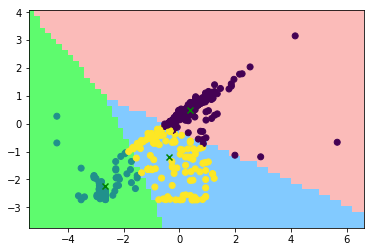

In [35]:
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score
import pandas as pd
from sklearn.preprocessing import StandardScaler


from sklearn.datasets import load_wine

dataTypesList = []
for i in predictData.dtypes:
    dataTypesList.append(i)
    
dfNum = predictData.select_dtypes(include=['float64', 'int64'])
y = dfNum['predict'].values
x = dfNum.drop('predict', axis=1).values

x_df = pd.DataFrame(x)
# print(x_df)

x1 = pd.DataFrame(x_df[2])
x2 = pd.DataFrame(x_df[3])
xNew = x1.join(x2)
# print(xNew)

scaler = StandardScaler()
scaler.fit(xNew)
# scaler.fit(Xc)
StandardScaler(copy=True, with_mean=True, with_std=True)
xNew = scaler.fit_transform(xNew)

kMeans = KMeans(n_clusters=3)   #, n_init=3, init='random', tol=1e-4, random_state=150)

cmap_light = ListedColormap(['#FBBBB9', '#5EFB6E', '#82CAFF'])
cmap_bold = ListedColormap(['#CA226B', '#387C44', '#2B65EC'])
cmap_test = ListedColormap(['#8E35EF', '#FFFF00', '#659EC7'])

new_fit = kMeans.fit(xNew)
new_y_pred = kMeans.predict(xNew)
new_centroids = kMeans.cluster_centers_


Xc = x[:, [2, 3]]
# print(Xc)

scaler = StandardScaler()
# scaler.fit(xNew)
scaler.fit(Xc)
StandardScaler(copy=True, with_mean=True, with_std=True)
# xNew = scaler.fit_transform(xNew)
Xc = scaler.fit_transform(Xc)

h=0.2
kMeans.fit(Xc, y)

yPredict = kMeans.predict(Xc)
homogenityScore = homogeneity_score(y, yPredict)
completenessScore = completeness_score(y, yPredict)
print('Homogeneity Score: ' + str(homogenityScore))
print('Completeness Score: ' + str(completenessScore))

# Plot the decision boundary
# For using meshgrid, you need to find the min max values of both attributes
# We usually make min/max a little lower/higher than the actual value
# here y is representing the second attributes, do not confuse it with the label
x_min, x_max = Xc[:, 0].min() - 1, Xc[:, 0].max() + 1
y_min, y_max = Xc[:, 1].min() - 1, Xc[:, 1].max() + 1

# make the meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

# add the classifier to the meshgrid
Z = kMeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plot the outcome
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# plt.scatter(xtrain[:, 0], xtrain[:, 1], c=ys_train, cmap=cmap_bold,edgecolor='k', s=40)
plt.scatter(Xc[:,0], Xc[:,1], c=kMeans.labels_)
plt.scatter(kMeans.cluster_centers_[:,0],  kMeans.cluster_centers_[:,1], 
            c='g', marker='x', linewidths=2)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
# plt.xlabel("alcohol")
# plt.ylabel("malic_acid")
# plt.title("3-Class classification");
plt.show()



# 2 - AnnualRate vs. 3 - RegularRate


Homogeneity Score: 0.423552408258
Completeness Score: 0.387274483515


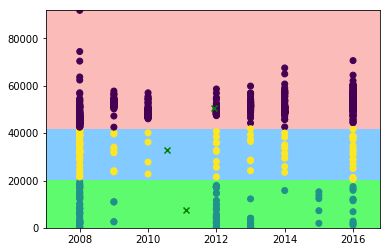

In [36]:
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score
import pandas as pd
from sklearn.preprocessing import StandardScaler


from sklearn.datasets import load_wine

dataTypesList = []
for i in predictData.dtypes:
    dataTypesList.append(i)
    
dfNum = predictData.select_dtypes(include=['float64', 'int64'])
y = dfNum['predict'].values
x = dfNum.drop('predict', axis=1).values

x_df = pd.DataFrame(x)
# print(x_df)

x1 = pd.DataFrame(x_df[1])
x2 = pd.DataFrame(x_df[3])
xNew = x1.join(x2)
# print(xNew)

# scaler = StandardScaler()
# scaler.fit(xNew)
# # scaler.fit(Xc)
# StandardScaler(copy=True, with_mean=True, with_std=True)
# xNew = scaler.fit_transform(xNew)

kMeans = KMeans(n_clusters=3)   #, n_init=3, init='random', tol=1e-4, random_state=150)

cmap_light = ListedColormap(['#FBBBB9', '#5EFB6E', '#82CAFF'])
cmap_bold = ListedColormap(['#CA226B', '#387C44', '#2B65EC'])
cmap_test = ListedColormap(['#8E35EF', '#FFFF00', '#659EC7'])

new_fit = kMeans.fit(xNew)
new_y_pred = kMeans.predict(xNew)
new_centroids = kMeans.cluster_centers_


Xc = x[:, [1, 3]]
# print(Xc)

# scaler = StandardScaler()
# # scaler.fit(xNew)
# scaler.fit(Xc)
# StandardScaler(copy=True, with_mean=True, with_std=True)
# # xNew = scaler.fit_transform(xNew)
# Xc = scaler.fit_transform(Xc)

h=0.2
kMeans.fit(Xc, y)

yPredict = kMeans.predict(Xc)
homogenityScore = homogeneity_score(y, yPredict)
completenessScore = completeness_score(y, yPredict)
print('Homogeneity Score: ' + str(homogenityScore))
print('Completeness Score: ' + str(completenessScore))

# Plot the decision boundary
# For using meshgrid, you need to find the min max values of both attributes
# We usually make min/max a little lower/higher than the actual value
# here y is representing the second attributes, do not confuse it with the label
x_min, x_max = Xc[:, 0].min() - 1, Xc[:, 0].max() + 1
y_min, y_max = Xc[:, 1].min() - 1, Xc[:, 1].max() + 1

# make the meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

# add the classifier to the meshgrid
Z = kMeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plot the outcome
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# plt.scatter(xtrain[:, 0], xtrain[:, 1], c=ys_train, cmap=cmap_bold,edgecolor='k', s=40)
plt.scatter(Xc[:,0], Xc[:,1], c=kMeans.labels_)
plt.scatter(kMeans.cluster_centers_[:,0],  kMeans.cluster_centers_[:,1], 
            c='g', marker='x', linewidths=2)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
# plt.xlabel("alcohol")
# plt.ylabel("malic_acid")
# plt.title("3-Class classification");
plt.show()
